## Importieren Bibliotheken

In [ ]:
import pandas as pd
import numpy as np


## Hochladen von Dateien

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving label_encoded_table.csv to label_encoded_table.csv


## Hinzufügen  globaler und lokaler Anomalien in einem Datensatz

In [ ]:
import pandas as pd
# Load the dataset
data = pd.read_csv('label_encoded_table.csv')

# Function to add global anomalies: Extreme outliers in numeric columns
def add_global_anomalies(df, column, num_anomalies=10, multiplier=10):
    anomaly_indices = np.random.choice(df.index, num_anomalies, replace=False)
    df.loc[anomaly_indices, column] = df[column].mean() + multiplier * df[column].std()
    return df

# Function to add local anomalies: Contextual changes in specific groups
def add_local_anomalies(df, condition_col, condition_value, target_col, num_anomalies=10, factor=1.5):
    condition_indices = df[df[condition_col] == condition_value].index
    if len(condition_indices) > 0:
        selected_indices = np.random.choice(condition_indices, min(num_anomalies, len(condition_indices)), replace=False)
        df.loc[selected_indices, target_col] *= factor
    return df

# Add global anomalies to 'AMOUNT' column
data_with_global_anomalies = add_global_anomalies(data.copy(), column='AMOUNT', num_anomalies=20)

# Add local anomalies where 'DEPARTMENT NAME' is 'DEPARTMENT OF HEALTH' to the 'AMOUNT' column
data_with_local_anomalies = add_local_anomalies(
    data.copy(),
    condition_col='DEPARTMENT NAME',
    condition_value='DEPARTMENT OF HEALTH',
    target_col='AMOUNT',
    num_anomalies=15,
    factor=1.5
)

# Save the results
data_with_global_anomalies.to_csv('data_with_global_anomalies.csv', index=False)
data_with_local_anomalies.to_csv('data_with_local_anomalies.csv', index=False)

print("Global anomalies added and saved to 'data_with_global_anomalies.csv'.")
print("Local anomalies added and saved to 'data_with_local_anomalies.csv'.")

Global anomalies added and saved to 'data_with_global_anomalies.csv'.
Local anomalies added and saved to 'data_with_local_anomalies.csv'.


In [ ]:
from google.colab import files

files.download('data_with_global_anomalies.csv')  # Replace 'data.csv' with your file name.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

files.download('data_with_local_anomalies.csv')  # Replace 'data.csv' with your file name.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Testen von fünf verschiedenen Machine-Learning-Algorithmen auf Performance und Vergleich

## Laden des Datensatzes und Aufteilen in Merkmale (Features) und Zielvariablen (Labels)

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('label_encoded_table.csv')  # Update with your dataset path
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Labels (the last column)



## Hilfsfunktion zur Bewertung von Modellen anhand von Klassifikationsmetriken

In [ ]:
# Helper function to evaluate model
def evaluate_model(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [ ]:
pip install scikit-learn


##  Laden des Datensatzes und Aufteilen in Trainings- und Testdatensätze

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Load your dataset
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('label_encoded_table.csv')

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Vergleich und Bewertung von fünf Klassifikationsmodellen

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load your dataset
df = pd.read_csv('label_encoded_table.csv')  # Replace with your actual dataset path

# Preprocessing
# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Handle missing values (example: fill with mean)
df.fillna(df.mean(), inplace=True)

# Splitting dataset
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to evaluate model
def evaluate_model(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Decision Tree
print("\n--- Decision Tree ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
evaluate_model(y_test, dt_predictions)

# Random Forest
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
evaluate_model(y_test, rf_predictions)

# Isolation Forest (for unsupervised anomaly detection)
print("\n--- Isolation Forest ---")
iso_model = IsolationForest(n_estimators=100, random_state=42, contamination=0.1)
iso_model.fit(X_train)
iso_predictions = iso_model.predict(X_test)
iso_predictions = [1 if p == 1 else 0 for p in iso_predictions]  # Convert -1/1 to 0/1
evaluate_model(y_test, iso_predictions)

# XGBoost
print("\n--- XGBoost ---")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
evaluate_model(y_test, xgb_predictions)

# LightGBM
print("\n--- LightGBM ---")
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)
evaluate_model(y_test, lgbm_predictions)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



--- Decision Tree ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       1.00      1.00      1.00      9607
           3       1.00      1.00      1.00       587
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00         9
          10       1.00      1.00      1.00      1083
          11       1.00      1.00      1.00       444
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00       956
          14       1.00      1.00      1.00       397
          15       1.00      1.00      1.00       212
          16       1.00      1.00      1.00       532
          17       1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           2       1.00      1.00      1.00      9607
           3       0.99      1.00      1.00       587
           4       0.94      0.91      0.92        32
           5       1.00      0.95      0.97        20
           6       1.00      0.71      0.83         7
           7       0.95      1.00      0.97        18
           8       1.00      0.78      0.88         9
          10       1.00      1.00      1.00      1083
          11       1.00      1.00      1.00       444
          12       1.00      0.88      0.93         8
          13       1.00      1.00      1.00       956
          14       0.99      1.00      1.00       397
          15       0.99      0.99      0.99       212
          16       1.00      0.99      0.99       532
          17       1.00      1.00      1.00     10815
          18       1.00      1.00      1.00       965
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00    9607.0
           3       0.00      0.00      0.00     587.0
           4       0.00      0.00      0.00      32.0
           5       0.00      0.00      0.00      20.0
           6       0.00      0.00      0.00       7.0
           7       0.00      0.00      0.00      18.0
           8       0.00      0.00      0.00       9.0
          10       0.00      0.00      0.00    1083.0
          11       0.00      0.00      0.00     444.0
          12       0.00      0.00      0.00       8.0
          13       0.00      0.00      0.00     956.0
          14       0.00      0.00      0.00     397.0
          15       0.00      0.00      0.00     212.0
          16       0.00      0.00      0.00     532.0
          17       0.00      0.00      0.00   10815.0
  

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:24:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       1.00      1.00      1.00      9607
           3       1.00      1.00      1.00       587
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00         9
          10       1.00      1.00      1.00      1083
          11       1.00      1.00      1.00       444
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00       956
          14       1.00      1.00      1.00       397
          15       1.00      1.00      1.00       212
          16       1.00      1.00      1.00       532
          17       1.00      1.00      1.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       1.00      0.31      0.47      9607
           3       0.00      0.00      0.00       587
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00         9
          10       0.00      0.00      0.00      1083
          11       0.00      0.00      0.00       444
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00       956
          14       0.00      0.00      0.00       397
          15       0.00      0.00      0.00       212
          16       0.15      0.01      0.01       532
          17       0.33      0.40      0.36     10815
          18       0.05      0.01      0.02       965
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Isolation Forest (for unsupervised anomaly detection)
print("\n--- Isolation Forest ---")
iso_model = IsolationForest(n_estimators=100, random_state=42, contamination=0.1)

# Fit on training data only
iso_model.fit(X_train)

# Predict anomalies on test data
iso_predictions = iso_model.predict(X_test)

# Convert predictions: 1 = normal, -1 = anomaly
iso_predictions = [1 if p == 1 else 0 for p in iso_predictions]  # Binary conversion

# If `y_test` contains known anomalies (binary: 0 = normal, 1 = anomaly), evaluate
if set(y_test.unique()) == {0, 1}:  # Ensure `y_test` is binary for comparison
    evaluate_model(y_test, iso_predictions)
else:
    print("y_test is not binary; metrics will not be meaningful.")



--- Isolation Forest ---
y_test is not binary; metrics will not be meaningful.


In [ ]:
print(y_test.value_counts())


DEPARTMENT_NAME_ENCODED
32    15195
17    10815
28    10590
35    10572
2      9607
25     1920
20     1308
34     1252
27     1228
38     1181
29     1106
10     1083
18      965
13      956
60      797
45      748
23      686
30      669
3       587
40      574
16      532
11      444
14      397
21      380
49      373
54      345
43      212
15      212
51      208
36      144
50      125
57      112
39       88
59       82
24       73
56       70
19       68
22       45
33       38
53       35
4        32
5        20
46       19
7        18
58       15
8         9
37        9
12        8
42        7
6         7
31        6
44        2
0         2
52        2
61        1
26        1
Name: count, dtype: int64


In [ ]:
# Threshold for rarity
anomaly_threshold = 100  # Departments with counts below this are considered anomalies

# Create a binary target variable for anomalies
department_counts = df['DEPARTMENT_NAME_ENCODED'].value_counts()
anomalous_departments = department_counts[department_counts < anomaly_threshold].index

# Convert DEPARTMENT_NAME_ENCODED to binary anomaly labels
df['is_anomaly'] = df['DEPARTMENT_NAME_ENCODED'].apply(lambda x: 1 if x in anomalous_departments else 0)

# Update X and y for Isolation Forest
X = df.drop(columns=['is_anomaly'])  # Features
y = df['is_anomaly']  # Target (binary)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Isolation Forest
print("\n--- Isolation Forest ---")
iso_model = IsolationForest(n_estimators=100, random_state=42, contamination=0.1)

# Fit on training data
iso_model.fit(X_train)

# Predict anomalies
iso_predictions = iso_model.predict(X_test)
iso_predictions = [1 if p == 1 else 0 for p in iso_predictions]  # Convert -1/1 to binary

# Evaluate the Isolation Forest
evaluate_model(y_test, iso_predictions)



--- Isolation Forest ---
Accuracy: 0.1002
Precision: 0.9941
Recall: 0.1002
F1 Score: 0.1805

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.18     75872
           1       0.00      0.69      0.00       108

    accuracy                           0.10     75980
   macro avg       0.50      0.39      0.09     75980
weighted avg       0.99      0.10      0.18     75980




--- Isolation Forest Feature Importance ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

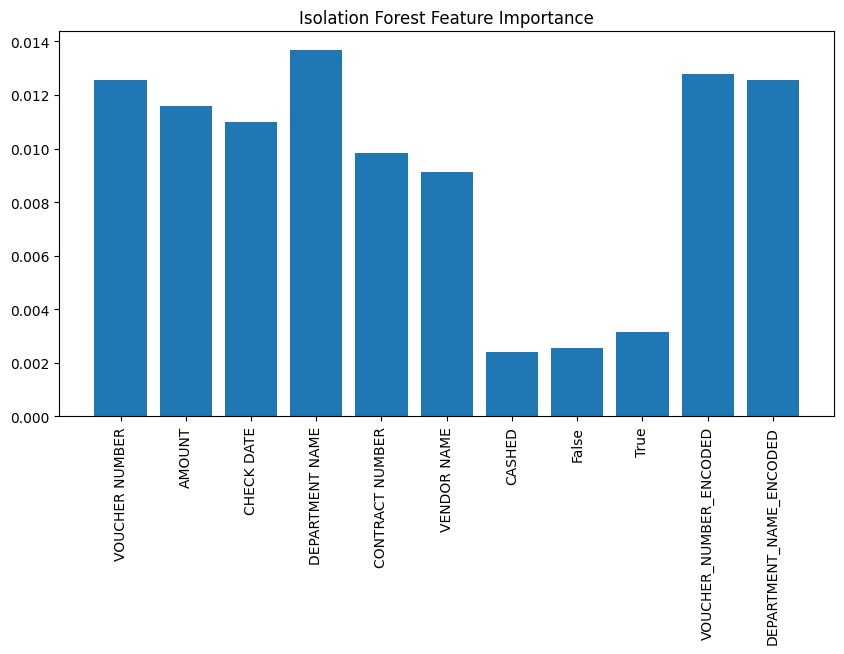


--- XGBoost Feature Importance ---


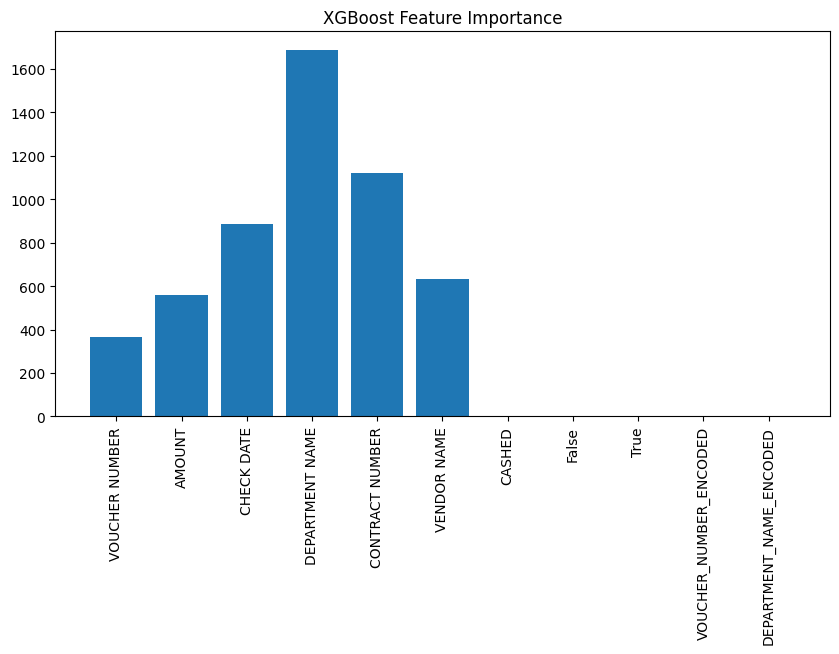

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Isolation Forest Feature Importance (Variance-based Approach)
def isolation_forest_feature_importance(model, X):
    baseline_scores = model.decision_function(X)
    importance = []
    for col in range(X.shape[1]):
        X_perturbed = X.copy()
        X_perturbed[:, col] = np.random.permutation(X_perturbed[:, col])  # Permute feature values
        perturbed_scores = model.decision_function(X_perturbed)
        score_diff = np.abs(baseline_scores - perturbed_scores)
        importance.append(score_diff.mean())
    return importance

print("\n--- Isolation Forest Feature Importance ---")
iso_importance = isolation_forest_feature_importance(iso_model, X_test.values)
iso_feature_importance = dict(zip(X_test.columns, iso_importance))

# Plot Isolation Forest Feature Importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(iso_feature_importance)), list(iso_feature_importance.values()))
plt.xticks(range(len(iso_feature_importance)), list(iso_feature_importance.keys()), rotation=90)
plt.title("Isolation Forest Feature Importance")
plt.show()

# XGBoost Feature Importance
print("\n--- XGBoost Feature Importance ---")

# Get feature importance with proper feature names
xgb_importance = xgb_model.get_booster().get_score(importance_type='weight')  # Use 'weight', 'gain', or 'cover'

# Map feature importance to feature names directly
xgb_feature_importance = {feature: xgb_importance.get(feature, 0) for feature in X_test.columns}

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(xgb_feature_importance)), list(xgb_feature_importance.values()))
plt.xticks(range(len(xgb_feature_importance)), list(xgb_feature_importance.keys()), rotation=90)
plt.title("XGBoost Feature Importance")
plt.show()

